In [2]:
import numpy
import json
import pandas as pd 

from sklearn.model_selection import train_test_split


from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,RobustScaler,FunctionTransformer,MinMaxScaler,PolynomialFeatures

# Carregar X
with open(r'lhs_samples.json','r') as file:
    lhs_samples=json.load(file)
with open(r'random_lhs_samples.json','r') as file:
    random_lhs_samples=json.load(file)

x=pd.DataFrame(lhs_samples).transpose()
x.set_index(x.index.astype(int))

random_x=pd.DataFrame(random_lhs_samples).transpose()
random_x.set_index(x.index.astype(int))
# Carregar Y
with open('ydados2.json','r') as file:
    y=json.load(file)
with open('yrandomdados2.json','r') as file:
    random_y=json.load(file)

y=pd.DataFrame(y).transpose()
y_random=pd.DataFrame(random_y).transpose()
y.set_index(y.index.astype(int))


y_random=y_random.set_index(y_random.index.astype(int))
y=y.set_index(y.index.astype(int))
x=x.set_index(x.index.astype(int))
random_x=random_x.set_index(random_x.index.astype(int))

union_index=[i for i in list(y.index) if i in list(y_random.index)]

y=y.loc[union_index]

y_random=y_random.loc[union_index]

random_x=random_x.loc[union_index]

x=x.loc[union_index]


false_index=(y.loc[((y['Convergencia_correntes']==False))]).index

x.drop(index=false_index,inplace=True)
random_x.drop(index=false_index,inplace=True)
y.drop(index=false_index,inplace=True)
y_random.drop(index=false_index,inplace=True)

# na_index=(y.loc[y['Lucro'].notna()==False]).index
# x.drop(index=na_index,inplace=True)
# random_x.drop(index=na_index,inplace=True)

# y.drop(index=na_index,inplace=True)
y_random=y_random.join(pd.DataFrame(y_random['AreaTC'].to_dict()).transpose().add_prefix('a_tc')).drop('AreaTC',axis=1)
y_random=y_random.join(pd.DataFrame(y_random['PotenciaCompressores'].to_dict()).transpose().add_prefix('p_comp')).drop('PotenciaCompressores',axis=1)
y_random=y_random.join(pd.DataFrame(y_random['MassaProcessVessel'].to_dict()).transpose().add_prefix('m_vessel_')).drop('MassaProcessVessel',axis=1)
y=y.join(pd.DataFrame(y['AreaTC'].to_dict()).transpose().add_prefix('a_tc')).drop('AreaTC',axis=1)
y=y.join(pd.DataFrame(y['PotenciaCompressores'].to_dict()).transpose().add_prefix('p_comp')).drop('PotenciaCompressores',axis=1)
y=y.join(pd.DataFrame(y['MassaProcessVessel'].to_dict()).transpose().add_prefix('m_vessel_')).drop('MassaProcessVessel',axis=1)

y_relative_error=((y-y_random)/y.replace(0.0,numpy.nan)).add_suffix('_erro',axis=1)
y_absolute_error=(y-y_random).add_suffix('_absolute_error',axis=1)

y=y.astype(float)
x=x.astype(float)
index_to_drop=y_relative_error.loc[y_relative_error['Lucro_erro'].abs()>0.1].index
y.drop(index=index_to_drop,inplace=True)
y_random.drop(index=index_to_drop,inplace=True)
x.drop(index=index_to_drop,inplace=True)
random_x.drop(index=index_to_drop,inplace=True)

y.sort_index()
y_random.sort_index()

y_mean=(y['Lucro']+y_random['Lucro'])/2
df=x.join(y)



df=df.astype(float)
var=[0,1,2,3,4,5,'Lucro']
dft=df[var]

dft.reset_index(drop=True,inplace=True)
dof=[0,1,2,3,4,5]
bins = numpy.linspace(0, 23200, 15)
y_binned = numpy.digitize(dft['Lucro'], bins)

X_train,X_test,y_train, y_test = train_test_split(dft[dof],dft['Lucro'], test_size=0.2, shuffle=True,random_state=5)


Otimização dos hiperparâmetros

In [3]:
# from sklearn.svm import SVR

# from sklearn import naive_bayes,metrics,neighbors
# from sklearn.gaussian_process import GaussianProcessRegressor
# from sklearn.gaussian_process import kernels
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,RobustScaler,FunctionTransformer
import optuna
import tensorflow as tf
import keras
from keras import optimizers

from Regressor import Regressor




sc=StandardScaler()
X_train_trans=sc.fit_transform(X_train)
X_test_trans=sc.transform(X_test)

# ft=RobustScaler().fit(y_train.values.reshape(1,-1))
# y_train_trans=ft.transform(y_train.values.reshape(1,-1))
# y_test_trans=ft.transform(y_test.values.reshape(1,-1))

Regressor(dft,'Lucro').param_optimization(X_train_trans,y_train)


c:\Users\LuanNogs\Documents\Ic-Metamodelagem\luanvenv\lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains RBF(length_scale=1) which is of type RBF.
  warnings.warn(message)
c:\Users\LuanNogs\Documents\Ic-Metamodelagem\luanvenv\lib\site-packages\Regressor.py:131: ExperimentalWarning: OptunaSearchCV is experimental (supported from v0.17.0). The interface can change in the future.
  optuna_search = optuna.integration.OptunaSearchCV(
[I 2024-02-05 22:00:36,530] A new study created in memory with name: no-name-7025f5cd-91b1-43f0-b931-b9714c1cb7a8
[I 2024-02-05 22:00:36,530] Searching the best hyperparameters using 763 samples...


[I 2024-02-05 22:00:39,928] Trial 0 finished with value: 0.9340317984507376 and parameters: {'n_estimators': 198, 'min_samples_split': 21, 'min_samples_leaf': 16, 'max_depth': 15}. Best is trial 0 with value: 0.9340317984507376.
[I 2024-02-05 22:00:47,056] Trial 1 finished with value: 0.9660060025120456 and parameters: {'n_estimators': 416, 'min_samples_split': 18, 'min_samples_leaf': 6, 'max_depth': 26}. Best is trial 1 with value: 0.9660060025120456.
[I 2024-02-05 22:00:58,787] Trial 2 finished with value: 0.9665249278522106 and parameters: {'n_estimators': 825, 'min_samples_split': 16, 'min_samples_leaf': 6, 'max_depth': 11}. Best is trial 2 with value: 0.9665249278522106.
[I 2024-02-05 22:01:06,222] Trial 3 finished with value: 0.9108559485079557 and parameters: {'n_estimators': 699, 'min_samples_split': 2, 'min_samples_leaf': 25, 'max_depth': 30}. Best is trial 2 with value: 0.9665249278522106.
[I 2024-02-05 22:01:10,600] Trial 4 finished with value: 0.8964860777282876 and paramet

TypeError: 'OptunaSearchCV' object is not iterable

Fit dos modelos 

In [2]:
from sklearn.svm import SVR
from sklearn import model_selection
from sklearn import naive_bayes,metrics,neighbors
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process import kernels
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,RobustScaler,FunctionTransformer,MinMaxScaler,PolynomialFeatures
import optuna
import pickle
import tensorflow as tf
import keras
from keras import optimizers
from sklearn.model_selection import train_test_split
from Regressor import Regressor
Regressor(dft,'Lucro').param_models()

with open(r'models.pickle','rb') as file:
    models=pickle.load(file)
    file.close()
pipeline_model={}
for name, model in models.items():
    
    model.fit(X_train,y_train)
    pipeline_model.update({name:model})
with open(r'pipeline_model.pickle','wb') as file:
    pickle.dump(pipeline_model,file)
    file.close()
    

c:\Users\LuanNogs\Documents\Ic-Metamodelagem\luanvenv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


INFO:tensorflow:Assets written to: C:\Users\LuanNogs\AppData\Local\Temp\tmp17_evcg0\assets


INFO:tensorflow:Assets written to: C:\Users\LuanNogs\AppData\Local\Temp\tmp17_evcg0\assets


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000125 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1386
[LightGBM] [Info] Number of data points in the train set: 692, number of used features: 6
[LightGBM] [Info] Start training from score 19713.106886
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

INFO:tensorflow:Assets written to: C:\Users\LuanNogs\AppData\Local\Temp\tmpdwfmv9rs\assets


INFO:tensorflow:Assets written to: C:\Users\LuanNogs\AppData\Local\Temp\tmpdwfmv9rs\assets


Qualidade dos modelos

In [10]:
from sklearn import metrics
import pickle
with open(r'pipeline_model.pickle','rb') as file:
    models=pickle.load(file)
    file.close()
for name, model in models.items():
    print('{}: '.format(name)+'{}'.format(metrics.r2_score(y_test,model.predict(X_test))))

RandomForestRegressor: 0.9803494667799603
GradientBoostingRegressor: 0.9807132643340638
XGBRFRegressor: 0.9731792369911164
LGBMRegressor: 0.9760169692052652
18/18 [==============================] - 0s 969us/step
RNA: 0.9777857298522474
GaussianProcessRegressor: 0.9592773445910143


Histograma Distribuição dos Erros dos modelos

20/20 [==============================] - 0s 1ms/step


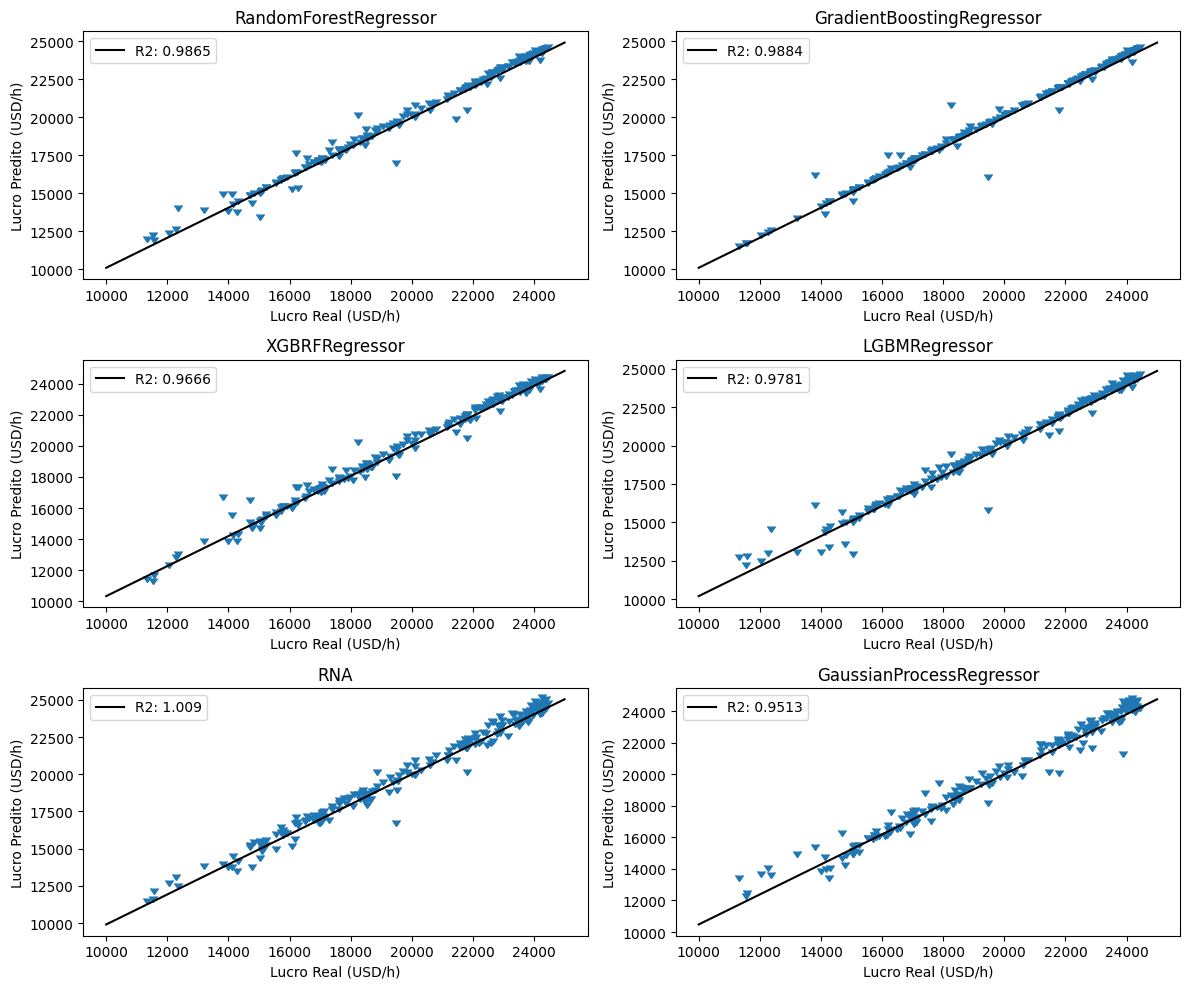

In [4]:
import matplotlib
import seaborn
import matplotlib.pyplot as plt
import pickle
with open(r'pipeline_model.pickle','rb') as file:
    models=pickle.load(file)
    file.close()

fig,axes=plt.subplots(3,2,figsize=(12,10))
axes=axes.flatten()
for k,(name,model) in enumerate(models.items()):
    axes[k].plot(y_test,models[name].predict(X_test),marker=7,linewidth=0)
    axes[k].set_title(name)
    axes[k].set_ylabel('Lucro Predito (USD/h)')

    axes[k].set_xlabel('Lucro Real (USD/h)')
    axes[k].xmargin=2
    axes[k].ymargin=2

    b,a=numpy.polyfit(y_test,models[name].predict(X_test),deg=1)
    xseq=numpy.linspace(10000,25000,10)
    axes[k].plot(xseq,(a+b*xseq),color='k',label='R2: {0:.4g}'.format(abs(b)))
    axes[k].legend()
fig.tight_layout()
# error=pd.concat([pd.DataFrame((y_test-models['RNA'].predict(X_test))).add_suffix('_erro',axis=1).abs(),y_test],axis=1,)
# seaborn.displot(error,x='Lucro',y='Lucro_erro',kind='kde')


1.0087119301297818

In [5]:
models['RNA'].predict(X_test)

20/20 [==============================] - 0s 4ms/step


array([24432.75 , 20784.348, 22593.11 , 23422.658, 18755.797, 19643.826,
       23414.633, 23876.746, 22392.645, 14800.995, 16833.541, 17234.174,
       18161.441, 23583.273, 16881.938, 12498.698, 15266.097, 17280.506,
       22192.906, 23092.639, 24236.547, 24465.26 , 15837.088, 18224.46 ,
       18148.406, 21079.537, 16492.855, 21908.521, 19959.994, 21060.705,
       24353.398, 24599.3  , 16557.861, 13966.857, 23683.625, 18983.04 ,
       23344.137, 17849.586, 23038.398, 23889.873, 17741.266, 18487.281,
       22559.04 , 24116.39 , 24725.059, 15028.584, 21563.627, 18663.045,
       11284.779, 24458.738, 21711.867, 16056.172, 15407.497, 17954.932,
       19800.98 , 16947.027, 20740.75 , 23221.023, 20050.84 , 23372.334,
       16243.477, 17000.846, 16409.355, 20339.414, 23312.684, 23787.229,
       24170.6  , 12891.309, 18756.875, 23286.918, 18558.566, 21453.84 ,
       19363.686, 20077.771, 17363.426, 24841.625, 15321.792, 22303.346,
       23350.2  , 20839.469, 22669.553, 18709.764, 

In [1]:
(y_test-models['RNA'].predict(X_test)).abs().plot.box()

NameError: name 'y_test' is not defined

Validação com Dados da Simulação 

In [7]:
import random
import pickle
from SimulacaoCalc import SimulationOps
with open(r'pipeline_model.pickle','rb') as file:
    models=pickle.load(file)
    file.close()


sim=SimulationOps(r'C:\Users\LuanNogs\Documents\Ic-Metamodelagem\Simulações\HidrogenaçãoCO2A.hsc')
validation_indexes=[i for i in random.sample(list(dft.index),5)]
samples=dft[dof].loc[validation_indexes]
for name, model in models.items():
    for i in samples.values:
        print(name+': \n')
        sim.set_dof_u(i)
        sim.pinch_analysis()
        print('profit: {}\n'.format(sim.profit()))
        print('pred: {}'.format(model.predict([i])))

RandomForestRegressor: 

profit: 23935.62892354615

pred: [24218.25227372]
RandomForestRegressor: 

profit: 24427.01925257319

pred: [24225.78406295]
RandomForestRegressor: 

profit: 23641.192107526265

pred: [23689.48139289]
RandomForestRegressor: 

profit: 21367.898471688437

pred: [20805.34911072]
RandomForestRegressor: 

profit: 24005.1522023946

pred: [24003.55298252]
GradientBoostingRegressor: 

profit: 24273.389368448457

pred: [24284.92758275]
GradientBoostingRegressor: 

profit: 24065.648482270874

pred: [24271.85253527]
GradientBoostingRegressor: 

profit: 23832.047149304097

pred: [23727.00666399]
GradientBoostingRegressor: 

profit: 21370.84020968445

pred: [20735.40145202]
GradientBoostingRegressor: 



KeyboardInterrupt: 